# Analysis of datetimes time zone and shifts
NOTE: python 3.7 installed locally, remote version  Python 3.7.7 on console?
**BEWARE** all precise locations to be masked even in folder path

In [11]:
#separated in case added later
PYRANOMETERS_ALL = ["Glamorgan", "East Midlands",  "Lazio A", "Lazio B",
           "Trentino Alto Adige tilted", "Trentino Alto Adige horizontal"]
#re-executing only final functions and visualisation outputs using cached variables
#execute=["Glamorgan", "Trentino Alto Adige tilted", "Trentino Alto Adige horizontal"]
execute = PYRANOMETERS_ALL

In [12]:
#calculated during the execution
#cleaned dataframes
dfcs = {}
#solar libraries
sls = {}
#starting timezones
tzis = {}

pycharm setup
https://stackoverflow.com/questions/36137671/pycharm-running-out-of-memory
-Xms128m to 512
Disabling plugin: as many as possible @fm beware java since not working after
https://intellij-support.jetbrains.com/hc/en-us/community/posts/115000459084-2017-2-update-running-out-of-memory-while-indexing-project
excluding resources

In [13]:
import sys

sys.path.insert(0, r'C:\Users\wsfm\OneDrive - Loughborough University\_Personal_Backup\python_repositories\ground-based-solar-irradiance\source')

import pandas as pd

#versione requiring array and not datetimeindex
#https://pvlib-python.readthedocs.io/en/stable/_modules/pvlib/spa.html

#from clear_sky import datetime_to_utc
import datetime
#no calendar used, instead datetime and strftime used for conversion from int to string
#import calendar
#calendar.month_abbr[month_number]


from typing import List, Dict

from os import getcwd #, listdir
from os.path import join, dirname

import data_operations as dtop
import irradiance_analysis as iran
import irradiance_plot as irplt

import matplotlib.pyplot as plt

#for commonly used decorators
import decorators
#for nb specific decorators
import functools


import clear_sky as csky
from clear_sky import SolarLibrary

import matplotlib as mpl

from empiricaldist import Pmf, Cdf
#https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb
#https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/distributions?ex=2

In [14]:
#excluding store to verify if cause problems
#retrieving stored variables
%store -r
#automatically reload
%load_ext autoreload
# autoreload 0 if deactivated 2 if all modules but excluded -
%autoreload 1
#interrupt when needed
%aimport data_operations, decorators, matplotlib, clear_sky, irradiance_analysis, irradiance_plot

#https://stackoverflow.com/questions/22934204/how-to-clear-variables-in-ipython
%reset

#https://ipython.readthedocs.io/en/stable/config/extensions/storemagic.html?highlight=store#IPython.extensions.storemagic.StoreMagics.store
# not working
%store -z

#remove unwanted cache
%store -d spam ax
%store -d _, __
%store -d cmp_sp_c_nd, cmp_sp_r_nd, cmp_sp_rm1nd
%store -d df_bzc, df_bzc30
%store -d dly_bz0c, dly_bz0cs, dly_bz30c, dly_bz30cs, dly_c, dly_r, dly r_s, dly_rm1_tz, dly_rm1cs, dly_rm4, dly_rm4cs
%store -d df_duplicates0, df_duplicates1, df_duplicates30, df_duplicates4, duplicates_c, duplicates_r

In [15]:
pd.set_option('display.max_columns', None)
#to solve copy warning
pd.set_option('mode.chained_assignment','raise')
print(f'Matplotlib conf file at: {mpl.matplotlib_fname()}', plt.style.available)
#Tmp removed not working on jupyter
#mpl.style.use(['seaborn-paper', 'thesis'])

#DEV NOTE 16/5/21: reading folders to be masked ?
PV_FOLDER_C=r"C:/Users/wsfm/OneDrive - Loughborough University/_Personal_Backup/_Research_Master/_Data Sources/Glamorgan/"
PV_FILE_C=r"devicedata_0921.csv"
ISC_IRRADIANCE_FILES_FOLDER = join(dirname(getcwd())+r"/assets/isc_irradiance_files/")
L_FOLDER=  r"C:/Users/wsfm/OneDrive - Loughborough University/_Personal_Backup/_Research_Master/_Data Sources/Lazio/"
L_PYR_C1="Pyranometer Cab 1_fm.csv"
L_PYR_C4="Pyranometer Cab 4_fm.csv"
TAA_FOLDER=  r"C:/Users/wsfm/OneDrive - Loughborough University/_Personal_Backup/_Research_Master/_Data Sources/Trentino Alto Adige/"
TAA_PYR="20110201_20190228_pc_Si6.csv"
#title for graphs
disconnection_title = f'Hourly disconnection analysis of %s from %s to %s'
delay_title = f'Daily comparison against sunpath of %s from %s to %s'
distribution_title = f'Monthly distribution of time difference between %s measurement'
#saving file
CSVS_FOLDER =  join(dirname(getcwd())+r"/outputs/csvs/")
ASSETS_FOLDER = join(dirname(getcwd()) + r"/assets/")


#parameters and labels
DELAY_PARAMETERS_ALL = {'delay_first_h':'sunrise and first',
             'delay_last_h':'sunset and last',
            'delay_transit_h':'sun transit and max',
            'delay_centre_h':'the centre and max'}

#Module position is retrieved through [digimap](#https://digimap.edina.ac.uk/)
LATITUDE = 52.7616
#negative longitude based on solar convention
LONGITUDE =  -1.2406
ALTITUDE = 79
PRESSURE = 101325.
TEMPERATURE = 12
DELTA_T = 67.0
ATMOS_REFRACT = 0.5667
TRANSMITTANCE = 0.5
GMIN = 20
SURFACE_ZENITH = 34
SURFACE_AZIMUTH = 180
NUMTHREADS = 4
#tbc where used
delta_t = DELTA_T
observer_longitude = LONGITUDE
observer_latitude = LATITUDE
observer_elevation = ALTITUDE
local_pressure =PRESSURE
local_temp = TEMPERATURE
atmos_refract = ATMOS_REFRACT
numthreads = NUMTHREADS

Matplotlib conf file at: c:\users\wsfm\onedrive - loughborough university\_personal_backup\python_repositories\venv\lib\site-packages\matplotlib\mpl-data\matplotlibrc ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10', 'thesis']


In [16]:
#decorators
describe_with_tukey_fence = decorators.add_tukey_fences(pd.DataFrame.describe)
plt_savefig = decorators.change_savefig(plt.savefig)
#removing white box appearing at the end
plt.close()
pd.read_csv = decorators.timer(pd.read_csv)
#common functions used during the NB


#function to extract hidden location info
def get_com_sl(func):
    #plt.show()
    @functools.wraps(func)
    def send_com_info(folder:str, *args, **kwargs):
        com_info = pd.read_csv(filepath_or_buffer=folder+'pv_com_info.csv', delimiter=",",header=0, index_col=0)
        for i in com_info.index:
            kwargs[i] = com_info.loc[i,"value"]
        value = func(*args, **kwargs)
        return value
    return send_com_info

SolarLibrary_com = get_com_sl(SolarLibrary)


TBC visualisation could be done, risk overlaps
## Reading and cleaning dataset
Exploratory analysis of file structure

### Glamrang system

https://stackoverflow.com/questions/10933838/how-to-read-a-csv-file-in-reverse-order-in-python
import csv
with open(PV_FOLDER+PV_FILE, 'r') as textfile:
    rows = list(csv.reader(textfile))
c = 0
print("First 10 rows")
for r in rows:
    print(', '.join(r))
    c += 1
    if c == 20:
        break
print("\n Last 5 rows")
c = 0
for r in reversed(rows):
    print(', '.join(r))
    c += 1
    if c == 5:
        break
print(len(rows))

In [18]:
sst = "Glamorgan"

Started 'read_csv' at 2021-06-05 10:33:06.541869
Started 'read_csv' at 2021-06-05 10:33:06.542869
Started 'read_csv' at 2021-06-05 10:33:06.543868
Finished 'read_csv' in 0:00:00.678999 secs
Finished 'read_csv' in 0:00:00.680999 secs
Finished 'read_csv' in 0:00:00.681999 secs
                  date  p150506_c0401005002_0501001a  \
0  2015-06-03 16:29:00                        489.25   
1  2015-06-03 16:30:00                        484.61   

   p150506_c0401005002_0501011a  
0                        209.44  
1                        217.52  
                       date  p150506_c0401005002_0501001a  \
597791  2016-08-11 09:21:00                         316.2   

        p150506_c0401005002_0501011a  
597791                     1543060.0  


In [ ]:
if sst in execute:
    gpoa_com = pd.read_csv(filepath_or_buffer=PV_FOLDER_C+PV_FILE_C, delimiter=";",skip_blank_lines=True,header=11,nrows=597792)
    #two values to starting check time step plus end
    print(gpoa_com.head(2))
    print(gpoa_com.tail(1))

In [19]:
if sst in execute:
    dfcs[sst], duplicates_c =dtop.clean_df(df= gpoa_com, dt_format='%Y-%m-%d %H:%M:%S')
    print(min(dfcs[sst].dt), max(dfcs[sst].dt))

Started 'clean_df' at 2021-06-05 10:33:07.248865
Finished 'clean_df' in 0:00:02.545003 secs
2015-06-03 16:29:00 2016-08-11 09:21:00


In [151]:
if sst in execute:
    gpoa_com_info = pd.read_csv(filepath_or_buffer=PV_FOLDER_C+'pv_com_info.csv', delimiter=",",header=0, index_col=0)
    surface_zenith_com = gpoa_com_info.loc["surface_tilt","value"]#%%
    altitude_com = gpoa_com_info.loc["altitude","value"]#
    latitude_com = gpoa_com_info.loc["latitude","value"]#
    longitude_com = gpoa_com_info.loc["longitude","value"]#
    sls[sst] = SolarLibrary(latitude=latitude_com, longitude=longitude_com, altitude=altitude_com,
                     temperature=TEMPERATURE, delta_t=DELTA_T, pressure=PRESSURE,
                      surface_zenith=surface_zenith_com, surface_azimuth=SURFACE_AZIMUTH,
                      atmos_refract=ATMOS_REFRACT, transmittance=TRANSMITTANCE,
                          timezone="Europe/London")

Started 'read_csv' at 2021-06-06 12:26:25.033217
Started 'read_csv' at 2021-06-06 12:26:25.034215
Started 'read_csv' at 2021-06-06 12:26:25.034215
Finished 'read_csv' in 0:00:00.007999 secs
Finished 'read_csv' in 0:00:00.007999 secs
Finished 'read_csv' in 0:00:00.008997 secs


### East Midlands system

In [22]:
sst = "East Midlands"

Started 'read_csv' at 2021-06-05 10:33:12.184862
Started 'read_csv' at 2021-06-05 10:33:12.184862
Started 'read_csv' at 2021-06-05 10:33:12.184862
Finished 'read_csv' in 0:00:05.754992 secs
Finished 'read_csv' in 0:00:05.754992 secs
Finished 'read_csv' in 0:00:05.756004 secs
   g_cmp11_ppuk              tmstamp           date_trunc
0           0.0  24/04/2013 00:00:00  24/04/2013 00:00:00
1           0.0  24/04/2013 00:01:00  24/04/2013 00:01:00
         g_cmp11_ppuk              tmstamp           date_trunc
4025943        -1.818  21/04/2021 23:59:00  21/04/2021 23:59:00


In [ ]:
if sst in execute:
    #one minute steps extracted (one second available)
    #DEV NOTE 29/5/21 based on DST days, one second rsl could be extracted from SQL if only four days taken
    #gpoa = pd.read_csv(filepath_or_buffer=join(ISC_IRRADIANCE_FILES_FOLDER,'chpoa_y15-20.csv'))
    gpoa = pd.read_csv(filepath_or_buffer=join(ISC_IRRADIANCE_FILES_FOLDER,'chpoa_y15-20m.csv'))
    print(gpoa.head(2))
    print(gpoa.tail(1))

In [23]:
if sst in execute:
    dfcs[sst], duplicates_r =dtop.clean_df(df= gpoa, dt_format='%d/%m/%Y %H:%M:%S',
                                    cln_order=["gpoa", "dt", "dt2"])
    print(min(dfcs[sst].dt), max(dfcs[sst].dt))

Started 'clean_df' at 2021-06-05 10:33:17.960854
Finished 'clean_df' in 0:00:19.929402 secs
2013-04-24 00:00:00 2021-04-21 23:59:00


In [149]:
if sst in execute:
#adding sunpath for datetimes verification
    sls[sst] = SolarLibrary(latitude=LATITUDE, longitude=LONGITUDE, altitude=ALTITUDE,
                     temperature=TEMPERATURE, delta_t=DELTA_T, pressure=PRESSURE,
                      surface_zenith=SURFACE_ZENITH, surface_azimuth=SURFACE_AZIMUTH,
                      atmos_refract=ATMOS_REFRACT, transmittance=TRANSMITTANCE,
                         timezone="Europe/London")
    print(sls[sst].altitude)

79


### Solar farms in Lazio, pyranometer 1 (A)

In [26]:
sst = "Lazio A"

Started 'read_csv' at 2021-06-05 10:33:47.768246
Started 'read_csv' at 2021-06-05 10:33:47.769246
Started 'read_csv' at 2021-06-05 10:33:47.769246
Finished 'read_csv' in 0:00:00.158050 secs
Finished 'read_csv' in 0:00:00.158050 secs
Finished 'read_csv' in 0:00:00.159050 secs
              #data  Piranometer Cab 1 Irradiance [W/sqm]
0  08/11/2016 00:00                                   NaN
1  08/11/2016 00:05                                   NaN
                   #data  Piranometer Cab 1 Irradiance [W/sqm]
248254  19/03/2019 23:50                                   NaN
248255  19/03/2019 23:55                                   NaN


In [ ]:
#first cleaning the dataset
if sst in execute:
    df_la = pd.read_csv(filepath_or_buffer=join(L_FOLDER,L_PYR_C1))
    #five minutes resolution
    print(df_la.iloc[:2,:2])
    print(df_la.iloc[-2:,:2])

In [27]:
if sst in execute:
    dfcs[sst], df_duplicates1 =dtop.clean_df(df_la, dt_format='%d/%m/%Y %H:%M')
    print(min(dfcs[sst].dt), max(dfcs["Lazio A"].dt))
    print(dfcs[sst].dropna().iloc[0,:])

Started 'clean_df' at 2021-06-05 10:33:47.950247
48 duplicates
Finished 'clean_df' in 0:00:00.912999 secs
2016-11-08 00:00:00 2019-03-19 23:55:00
dt      2016-11-08 15:00:00
gpoa                    104
Name: 180, dtype: object


In [152]:
if  any(["Lazio" in c for c in execute]):
    sl_l = SolarLibrary_com(folder=L_FOLDER)
    sl_l.timezone = 'Europe/Rome'
    sls["Lazio A"] = sl_l
    sls["Lazio B"] = sl_l

Started 'read_csv' at 2021-06-06 12:27:39.306650
Started 'read_csv' at 2021-06-06 12:27:39.306650
Started 'read_csv' at 2021-06-06 12:27:39.306650
Finished 'read_csv' in 0:00:00.005013 secs
Finished 'read_csv' in 0:00:00.005013 secs
Finished 'read_csv' in 0:00:00.005013 secs


### Solar farms in Lazio, pyranometer 4 (B)

In [30]:
sst = "Lazio B"

Started 'read_csv' at 2021-06-05 10:33:49.548761
Started 'read_csv' at 2021-06-05 10:33:49.548761
Started 'read_csv' at 2021-06-05 10:33:49.548761
Finished 'read_csv' in 0:00:00.172996 secs
Finished 'read_csv' in 0:00:00.172996 secs
Finished 'read_csv' in 0:00:00.172996 secs
#data                                   08/11/2016 00:10
Piranometer Cab 4 Irradiance [W/sqm]                 NaN
Name: 2, dtype: object
#data                                   11/11/2016 11:20
Piranometer Cab 4 Irradiance [W/sqm]                 488
Name: 1000, dtype: object


In [ ]:
if sst in execute:
    df_lb= pd.read_csv(filepath_or_buffer=join(L_FOLDER,L_PYR_C4))
    print(df_lb.iloc[2,:2])
    print(df_lb.iloc[1000,:2])


In [ ]:
if sst in execute:
    dfcs[sst], df_duplicates4 =dtop.clean_df(df_lb, dt_format='%d/%m/%Y %H:%M')
    print(min(dfcs[sst].dt), max(dfcs[sst].dt))
    print(dfcs[sst].dropna().iloc[0,:])

### System in Trentino Alto Adige: tilted pyranometer

In [32]:
if any(["Trentino" in c for c in execute]):
    df_taa = pd.read_csv(filepath_or_buffer=join(TAA_FOLDER,TAA_PYR))
    #15 minutes resolution
    print(df_taa.head(2))
    print(df_taa.tail(2))

Started 'read_csv' at 2021-06-05 10:33:51.368758
Started 'read_csv' at 2021-06-05 10:33:51.371759
Started 'read_csv' at 2021-06-05 10:33:51.372761
Finished 'read_csv' in 0:00:00.543993 secs
Finished 'read_csv' in 0:00:00.544995 secs
Finished 'read_csv' in 0:00:00.549035 secs
               time  T_ambient  CMP11_global_30  Gill_wind_speed  \
0  01/02/2011 00:00        NaN              NaN              NaN   
1  01/02/2011 00:15        NaN              NaN              NaN   

   CMP11_diffuse  CMP11_global_horiz  Gill_wind_direction  Gill_wind_speed_1  \
0            NaN                 NaN                  NaN                NaN   
1            NaN                 NaN                  NaN                NaN   

   I_dc  U_dc  P_dc  P_ac  pc_Si6_mod_temp  
0   NaN   NaN   NaN   NaN              NaN  
1   NaN   NaN   NaN   NaN              NaN  
                    time  T_ambient  CMP11_global_30  Gill_wind_speed  \
283231  28/02/2019 23:45   4.704398        -1.465421         0.782667 

In [33]:
sst = "Trentino Alto Adige tilted"

In [ ]:
if sst in execute:
    dfcs[sst], df_duplicates30 =dtop.clean_df(df_taa.loc[:,["time","CMP11_global_30"]])
    print(dfcs[sst].head(2))

In [ ]:
if sst in execute:
    sl_t30= SolarLibrary_com(folder=TAA_FOLDER)
    sl_t30.timezone = 'Europe/Rome'
    sls[sst] = sl_t30
    print(sl_t30.surface_zenith)

### System monitored in Trentino Alto Adige: horizontal pyranometer

In [ ]:
sst = "Trentino Alto Adige horizontal"

In [ ]:
if sst in execute:
    dfcs[sst], df_duplicates0 =dtop.clean_df(df_taa.loc[:,["time","CMP11_global_horiz"]])
    print(dfcs[sst].head(1))

In [154]:
# import copy could be used in py
if sst in execute:
    #reading again to avoid changing tilted
    sl_t0= SolarLibrary_com(folder=TAA_FOLDER)
    sl_t0.timezone = 'Europe/Rome'
    sl_t0.surface_zenith = 0
    sls[sst] = sl_t0

Started 'read_csv' at 2021-06-06 12:28:32.427294
Started 'read_csv' at 2021-06-06 12:28:32.428295
Started 'read_csv' at 2021-06-06 12:28:32.428295
Finished 'read_csv' in 0:00:00.003000 secs
Finished 'read_csv' in 0:00:00.003000 secs
Finished 'read_csv' in 0:00:00.004001 secs


# Time zone and timeshifts analysis

In [39]:
#wrap up function for this section
@decorators.timer
def get_dfs_dst_steps(dfcs:Dict[str,pd.DataFrame], sls:Dict[str, SolarLibrary], years:List):
    df_steps = pd.DataFrame()
    df_steps_dt = pd.DataFrame()
    labels = [l for l in dfcs.keys()]
    for l in labels:
        dfc = dfcs[l]
        sl = sls[l]

        dst_steps, dst_steps_dt = dtop.get_dst_steps(dt=dfc.dt, tz=sl.timezone, years=years)

        df_steps = df_steps.append(dst_steps, ignore_index=True)
        df_steps_dt = df_steps_dt.append(dst_steps_dt, ignore_index=True)

    df_steps.index = labels
    df_steps_dt.index = labels

    return df_steps, df_steps_dt



@decorators.timer
def get_delays_overview(dfcs, tzis, sls, labels, parameters:Dict[str, str]=DELAY_PARAMETERS_ALL
                        , delays_difference_max_h=None): #,add_utc=False):
    """
    Wrap-up function for comparison with sunrise/sunset/transit and DST split
    :param dfcs:
    :param tzis:
    :param sls:
    :param labels:
    :param parameters:
    :return:
    """
    delays_cl = [k for k in parameters.keys()]
    if isinstance(dfcs, List) and len(dfcs)>0:
        cmps = []
        dsc = pd.DataFrame(columns=[c+"_w" for c in  delays_cl]+[c+"_s" for c in  delays_cl])
        start = True
        for dfc, tz, sl, lb in zip(dfcs, tzis, sls, labels):
            dly_mm = dtop.groupby_with_utc(dfc=dfc, tzi=tz, gmin=GMIN)
            cmp_sp = iran.compare_with_sunpath(dly_mm=dly_mm, tzi='utc', sl=sl, delays_difference_max_h=delays_difference_max_h, utc_out=True)
            #splitting for dst
            cmp_s, cmp_w = dtop.df_split_dst(cmp_sp, sl_tz=sl.timezone, tzi='utc')
            md_w = cmp_w.describe(percentiles=[0.5]).loc["50%", delays_cl]
            md_s = cmp_s.describe(percentiles=[0.5]).loc["50%", delays_cl]
            dsc = dsc.append(dict(zip(dsc.columns.to_list(), md_w.append(md_s).values)), ignore_index=True)
            if start:
                cmps = [(cmp_w, cmp_s)]
                start = False
            else:
                cmps.append((cmp_w, cmp_s))
                #sl_tzi = sl_tzi.append(sl.timezone)
        #irplt.plot_monthly_delays(cmps=cmps, labels=labels, tzi=tzi, sl_tzi=sl_tzi, parameters=parameters)
        """if add_utc:
            for dl in delays_cl:
                print(dsc[dl])"""
        #else:
        dsc.index = labels
    else:
        for i in [dfcs, tzi, sls, labels]:
            if isinstance(i, List) and len(i)==1:
                i = i[0]
        dly_mm = dtop.groupby_with_utc(dfc=dfcs.copy(), tzi=tzi, gmin=GMIN)
        cmps = iran.compare_with_sunpath(dly_mm=dly_mm, tzi='utc', sl=sls, delays_difference_max_h=2, utc_out=True)
        dsc = cmps.describe()
        #irplt.plot_monthly_delays(cmps=[cmp_sp], labels=[labels], tzi=[tzi], sl_tzi=[sls.timezone], parameters=parameters)
    return cmps, dsc

def plot_daily_delays_overview(cmps, dfcs, tzi, sls, labels):
    if isinstance(dfcs, List) and len(dfcs)>0:
        start = True
        for cmp, dfc, tz, sl, lb in zip(cmps, dfcs, tzi, sls, labels):
            delays = iran.get_sunpath_delays(cmp_sp_tz=cmp, shifts=[0], tzi=["utc", sl.timezone], sl =sl,
                                        sunpath_filter=True, dates=True)
            if start:
                delayss = [delays]
                start = False
            else:
                delayss.append(delays)
            irplt.plot_delay_dates_tzi_shifts(df_c=dfc, delays=delays, sl=sl, label=lb, plt_prm=None)
    return delayss

## Timeshift and maximum measurement delay analysis for all selected pyranometers

In [158]:
#defining input parameters
labels = [k for k in dfcs.keys()]
dfcs_v =[v for v in dfcs.values()]
sls_v = [v for v in sls.values()]
tzs_v = [s.timezone for s in sls_v]
#test only (confidential)
print([f"{l}:lon {s.longitude}, lat {s.latitude}" for l,s in zip(labels, sls_v)])
print([f"{l}:{t},{s.surface_zenith},{s.surface_azimuth}" for l,t,s in zip(labels, tzs_v, sls_v)])

['Glamorgan:lon -3.3873055560000003, lat 51.45399999999999', 'East Midlands:lon -1.2406, lat 52.7616', 'Lazio A:lon 12.301606, lat 41.841831', 'Lazio B:lon 12.301606, lat 41.841831', 'Trentino Alto Adige tilted:lon 11.329, lat 46.458', 'Trentino Alto Adige horizontal:lon 11.329, lat 46.458']
['Glamorgan:Europe/London,20.0,180', 'East Midlands:Europe/London,34,180', 'Lazio A:Europe/Rome,30.0,180', 'Lazio B:Europe/Rome,30.0,180', 'Trentino Alto Adige tilted:Europe/Rome,30.0,188.5', 'Trentino Alto Adige horizontal:Europe/Rome,0,188.5']


In [156]:
print([f"{l}:{s.altitude},{s.surface_zenith},{s.surface_azimuth}" for l,t,s in zip(labels, tzs_v, sls_v)])

['Glamorgan:0.0,20.0,180', 'East Midlands:79,34,180', 'Lazio A:0.0,30.0,180', 'Lazio B:0.0,30.0,180', 'Trentino Alto Adige tilted:247.0,30.0,188.5', 'Trentino Alto Adige horizontal:247.0,0,188.5']


In [41]:
#first analysis around dst
years=[2015, 2016, 2017, 2018]
dst_steps, dst_steps_dt = get_dfs_dst_steps(dfcs=dfcs, sls=sls, years=years)
dst_steps

Started 'get_dfs_dst_steps' at 2021-06-05 10:33:54.260754
Finished 'get_dfs_dst_steps' in 0:00:09.032991 secs


,2015_dst,2015_ndst,2016_dst,2016_ndst,2017_dst,2017_ndst,2018_dst,2018_ndst
Glamorgan,NaN,60.0,60.0,NaN,NaN,NaN,NaN,NaN
East Midlands,60.0,216.0,60.0,60.0,60.0,60.0,60.0,60.0
Lazio A,NaN,NaN,NaN,NaN,3900.0,300.0,3900.0,300.0
Lazio B,NaN,NaN,NaN,NaN,3900.0,300.0,3900.0,300.0
Trentino Alto Adige tilted,4500.0,900.0,4500.0,900.0,4500.0,900.0,4500.0,900.0
Trentino Alto Adige horizontal,4500.0,900.0,4500.0,900.0,4500.0,900.0,4500.0,900.0


In [42]:
#output manipulation
columns_new = [c.replace("_ndst", " DST end +/- 1d").replace("_dst", " DST start +/- 1d") for c in dst_steps.columns.to_list()]
dst_steps_out = dst_steps.rename(columns=dict(zip(dst_steps.columns.to_list(),columns_new)))
dst_steps_out.to_csv(join(CSVS_FOLDER,"dst_steps.csv"))
dst_steps_out

,2015 DST start +/- 1d,2015 DST end +/- 1d,2016 DST start +/- 1d,2016 DST end +/- 1d,2017 DST start +/- 1d,2017 DST end +/- 1d,2018 DST start +/- 1d,2018 DST end +/- 1d
Glamorgan,NaN,60.0,60.0,NaN,NaN,NaN,NaN,NaN
East Midlands,60.0,216.0,60.0,60.0,60.0,60.0,60.0,60.0
Lazio A,NaN,NaN,NaN,NaN,3900.0,300.0,3900.0,300.0
Lazio B,NaN,NaN,NaN,NaN,3900.0,300.0,3900.0,300.0
Trentino Alto Adige tilted,4500.0,900.0,4500.0,900.0,4500.0,900.0,4500.0,900.0
Trentino Alto Adige horizontal,4500.0,900.0,4500.0,900.0,4500.0,900.0,4500.0,900.0


In [43]:
dst_steps_dt
#step analys showed timezone used for not UK ones

,2015_dst,2015_ndst,2016_dst,2016_ndst,2017_dst,2017_ndst,2018_dst,2018_ndst
Glamorgan,NaT,2015-10-24 00:01:00,2016-03-26 00:01:00,NaT,NaT,NaT,NaT,NaT
East Midlands,2015-03-28 00:01:00,2015-10-24 07:45:36,2016-03-26 00:01:00,2016-10-29 00:01:00,2017-03-25 00:01:00,2017-10-28 00:01:00,2018-03-24 00:01:00,2018-10-27 00:01:00
Lazio A,NaT,NaT,NaT,NaT,2017-03-26 03:00:00,2017-10-28 00:05:00,2018-03-25 03:00:00,2018-10-27 00:05:00
Lazio B,NaT,NaT,NaT,NaT,2017-03-26 03:00:00,2017-10-28 00:05:00,2018-03-25 03:00:00,2018-10-27 00:05:00
Trentino Alto Adige tilted,2015-03-29 03:00:00,2015-10-24 00:15:00,2016-03-27 03:00:00,2016-10-29 00:15:00,2017-03-26 03:00:00,2017-10-28 00:15:00,2018-03-25 03:00:00,2018-10-27 00:15:00
Trentino Alto Adige horizontal,2015-03-29 03:00:00,2015-10-24 00:15:00,2016-03-27 03:00:00,2016-10-29 00:15:00,2017-03-26 03:00:00,2017-10-28 00:15:00,2018-03-25 03:00:00,2018-10-27 00:15:00


In [44]:
#evalution DST splitted, utc for UK, time zone for other ones
cmps_all, dsc_all = get_delays_overview(dfcs=dfcs_v, tzis=['utc']*2+tzs_v[2:], sls=sls_v, labels=labels,
parameters=DELAY_PARAMETERS_ALL, delays_difference_max_h=None)

Started 'get_delays_overview' at 2021-06-05 10:34:03.434746
Finished 'get_delays_overview' in 0:00:13.098555 secs


Monthly distribution of time difference between sun transit and max measurement.jpg saved at C:\Users\wsfm\OneDrive - Loughborough University\_Personal_Backup\python_repositories\ground-based-solar-irradiance/outputs/figures/
Monthly distribution of time difference between the centre and max measurement.jpg saved at C:\Users\wsfm\OneDrive - Loughborough University\_Personal_Backup\python_repositories\ground-based-solar-irradiance/outputs/figures/


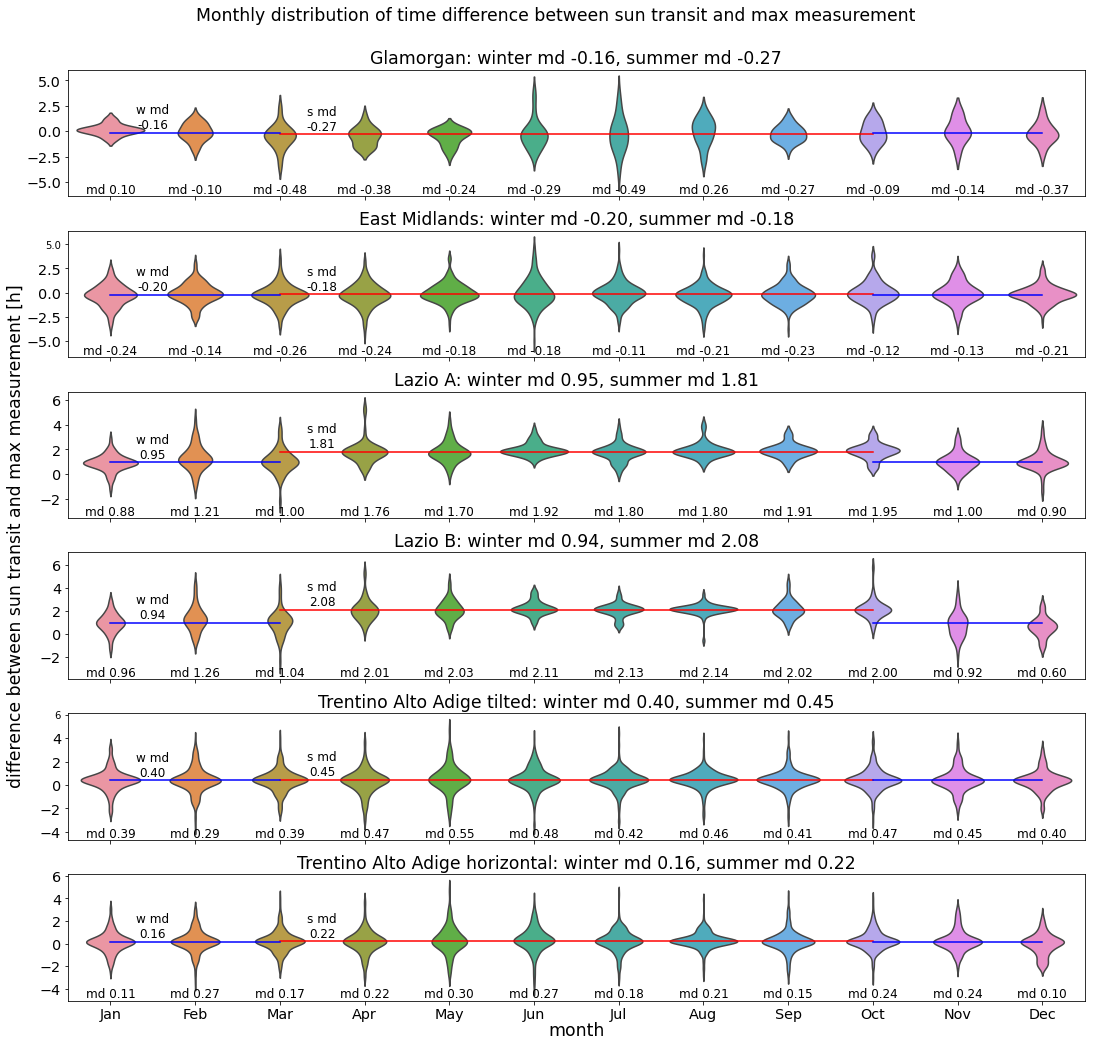

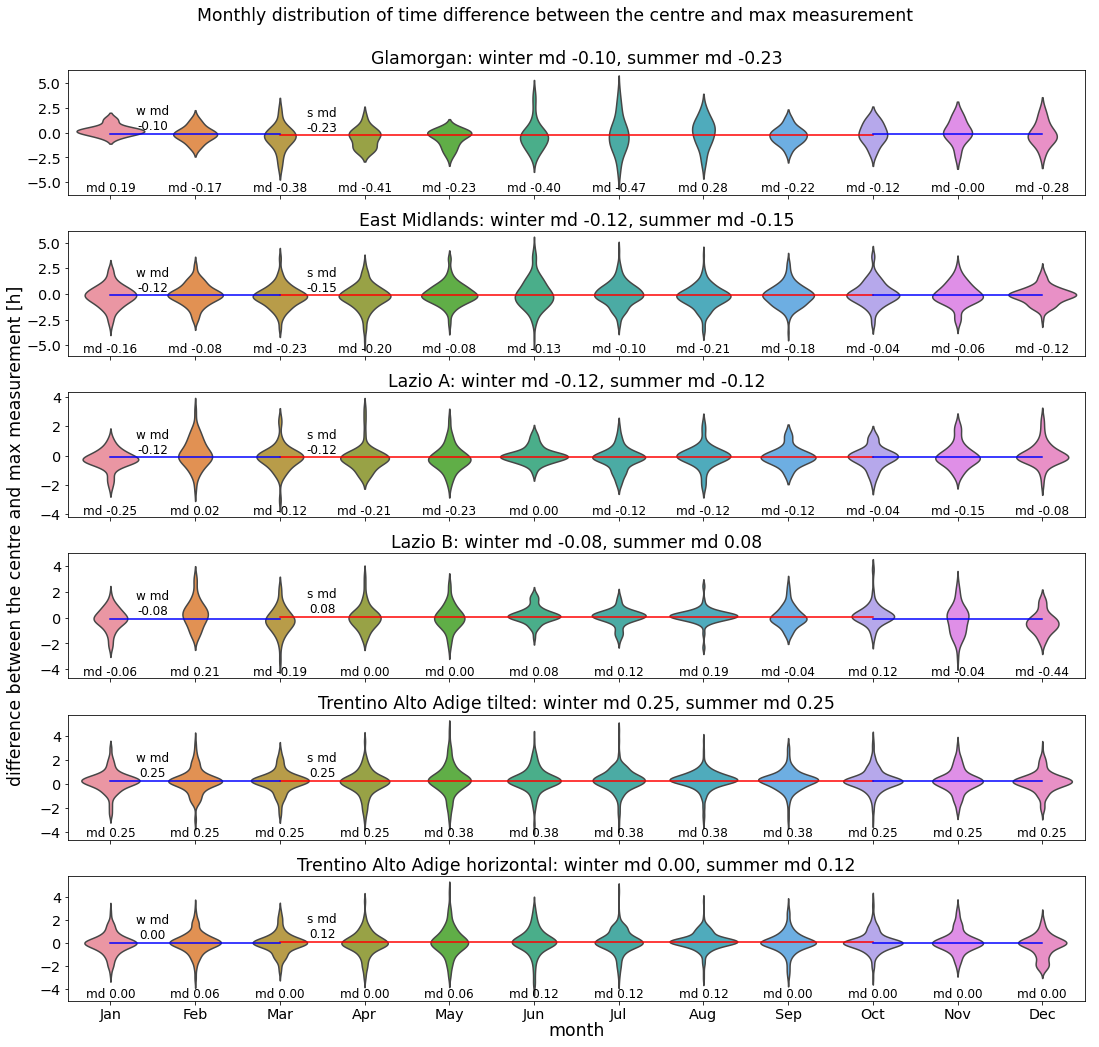

In [51]:
#re-merge for overall analysis
parameters = {'delay_transit_h':'sun transit and max',
            'delay_centre_h':'the centre and max'}
mrg_cmps = [pd.concat([w, s], sort=True) for w, s in cmps_all]
figs_values = irplt.plot_monthly_delays(cmps=mrg_cmps, labels=labels, sl_tzi=tzs_v, parameters=parameters, 
                                  suptitle_root=distribution_title)

In [46]:
#adding average year and show results in minutes
figs_values["y"] = figs_values.apply(lambda x: (x["s"]+x["w"])/2, axis=1)
figs_values = figs_values.applymap(lambda x: round(x*60,0) if isinstance(x, float) else x)

,1,2,3,4,5,6,7,8,9,10,11,12,column,label,s,w,y
0,6.0,-6.0,-29.0,-23.0,-14.0,-17.0,-29.0,16.0,-16.0,-5.0,-8.0,-22.0,delay_transit_h,Glamorgan,-16.0,-10.0,-13.0
1,-15.0,-8.0,-15.0,-14.0,-11.0,-11.0,-7.0,-13.0,-14.0,-7.0,-8.0,-13.0,delay_transit_h,East Midlands,-11.0,-12.0,-11.0
2,53.0,73.0,60.0,106.0,102.0,115.0,108.0,108.0,115.0,117.0,60.0,54.0,delay_transit_h,Lazio A,109.0,57.0,83.0
3,57.0,75.0,62.0,121.0,122.0,127.0,128.0,129.0,121.0,120.0,55.0,36.0,delay_transit_h,Lazio B,125.0,56.0,91.0
4,24.0,18.0,23.0,28.0,33.0,29.0,25.0,27.0,25.0,28.0,27.0,24.0,delay_transit_h,Trentino Alto Adige tilted,27.0,24.0,26.0
5,7.0,16.0,10.0,13.0,18.0,16.0,11.0,13.0,9.0,14.0,14.0,6.0,delay_transit_h,Trentino Alto Adige horizontal,13.0,10.0,11.0
6,12.0,-10.0,-23.0,-24.0,-14.0,-24.0,-28.0,16.0,-13.0,-7.0,-0.0,-17.0,delay_centre_h,Glamorgan,-14.0,-6.0,-10.0
7,-10.0,-5.0,-14.0,-12.0,-5.0,-8.0,-6.0,-12.0,-11.0,-3.0,-4.0,-8.0,delay_centre_h,East Midlands,-9.0,-8.0,-8.0
8,-15.0,1.0,-8.0,-12.0,-14.0,0.0,-8.0,-8.0,-8.0,-2.0,-9.0,-5.0,delay_centre_h,Lazio A,-8.0,-8.0,-8.0
9,-4.0,12.0,-11.0,0.0,0.0,5.0,8.0,11.0,-2.0,8.0,-2.0,-26.0,delay_centre_h,Lazio B,5.0,-5.0,0.0


## First and last measurement delays analysis for all selected pyranometers

Monthly distribution of time difference between sunrise and first measurement.jpg saved at C:\Users\wsfm\OneDrive - Loughborough University\_Personal_Backup\python_repositories\ground-based-solar-irradiance/outputs/figures/
Monthly distribution of time difference between sunset and last measurement.jpg saved at C:\Users\wsfm\OneDrive - Loughborough University\_Personal_Backup\python_repositories\ground-based-solar-irradiance/outputs/figures/


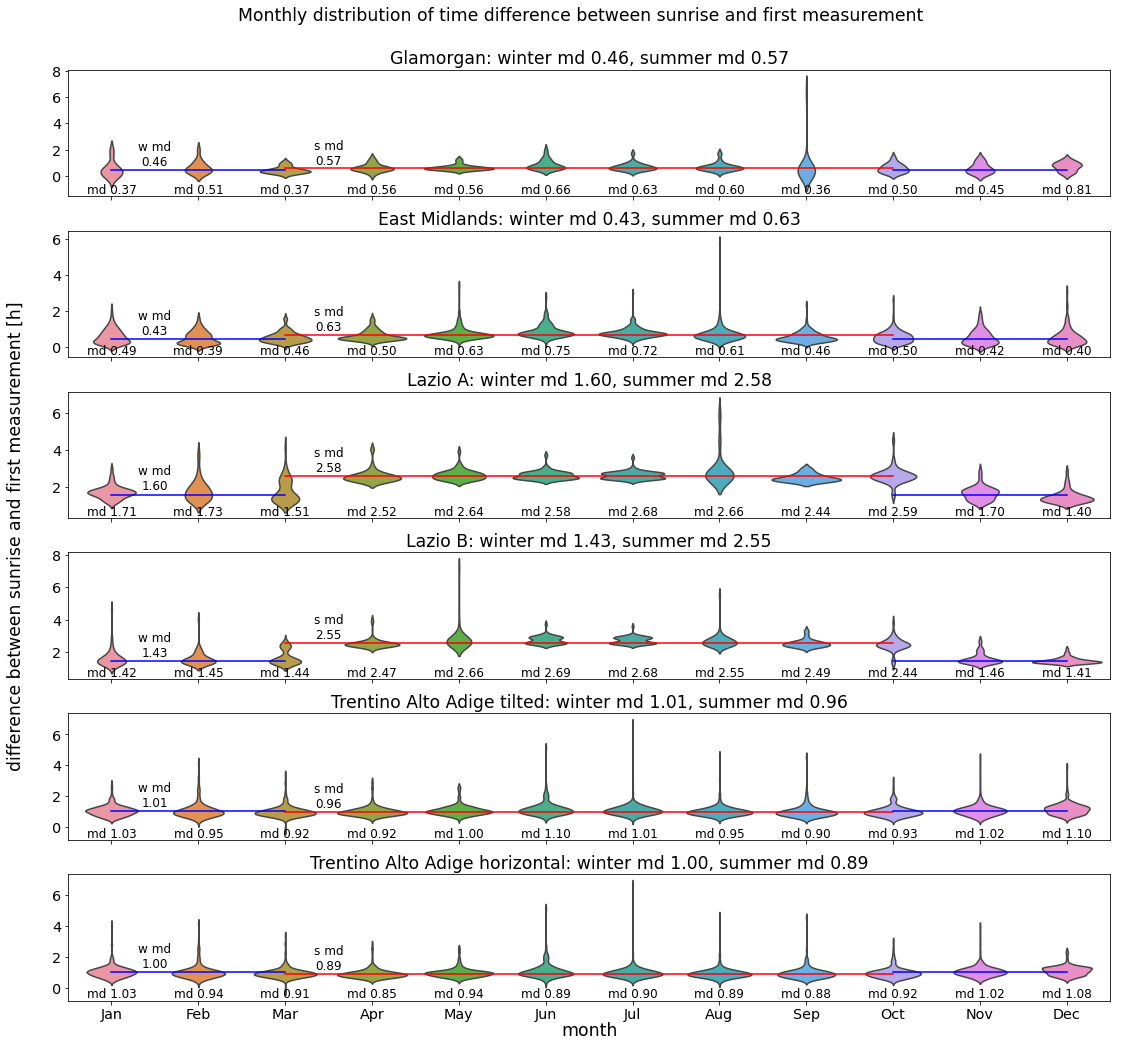

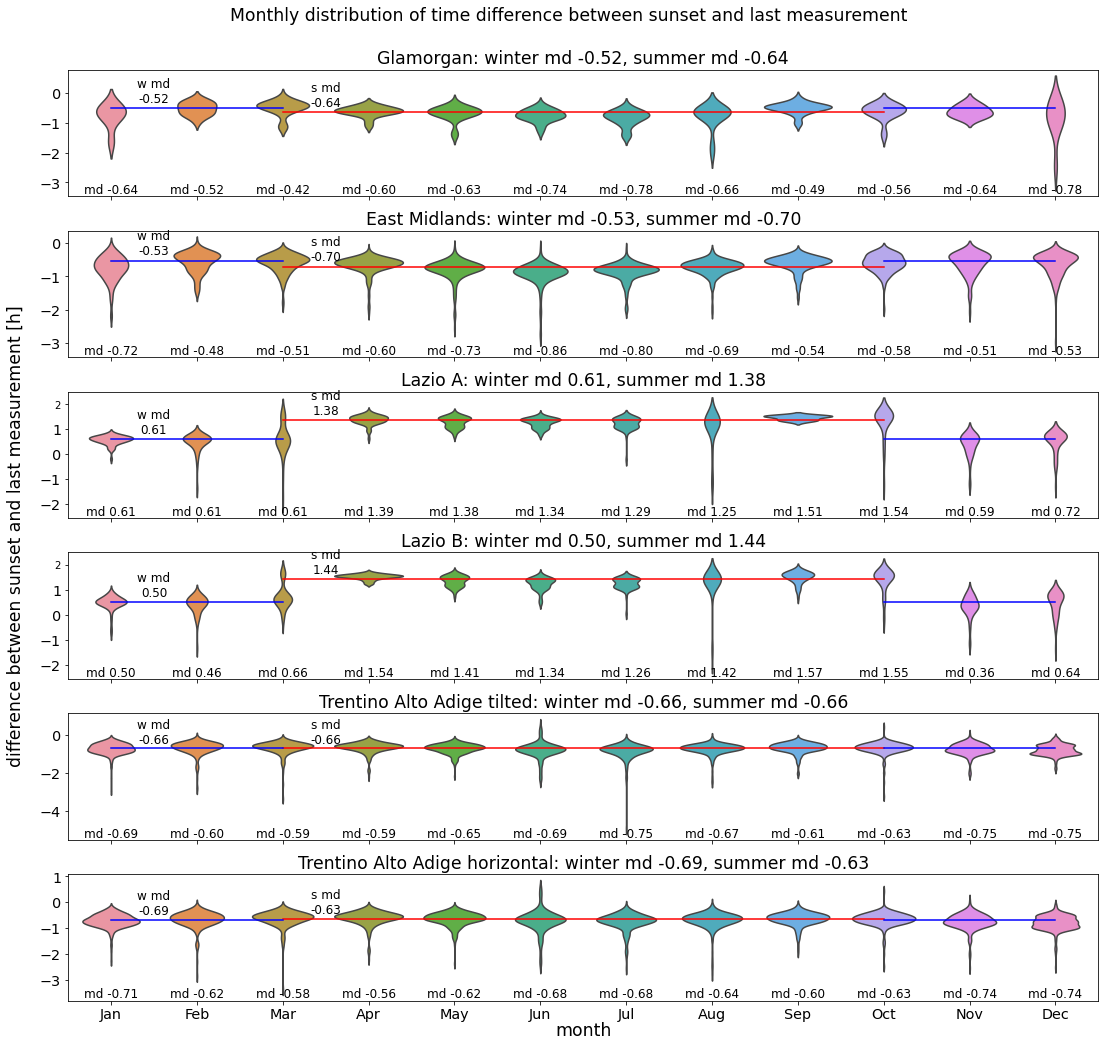

In [134]:
#re-merge for overall analysis
parameters = {'delay_first_h':'sunrise and first',
            'delay_last_h':'sunset and last'}
figs_values_riseset = irplt.plot_monthly_delays(cmps=mrg_cmps, labels=labels, sl_tzi=tzs_v, parameters=parameters)

In [135]:
#adding average year and show results in minutes
figs_values_riseset["y"] = figs_values_riseset.apply(lambda x: (x["s"]+x["w"])/2, axis=1)
figs_values_riseset = figs_values_riseset.applymap(lambda x: round(x*60,0) if isinstance(x, float) else x)

In [136]:
values_columns = [c for c in figs_values_riseset.columns.to_list() if c not in ["label", "column"]]
# calculating difference in abs value
for l in figs_values_riseset.label.unique():
    df_t = figs_values_riseset.loc[(figs_values_riseset.label == l) & (figs_values_riseset.column != "delay_diff"),
                                   values_columns]
    dff = df_t.iloc[0,:]+df_t.iloc[-1,:]
    s = dict(zip(values_columns+["label", "column"], list(dff.apply(abs).values) + [l, "delay_diff"]))
    figs_values_riseset = figs_values_riseset.append(s, ignore_index=True)
figs_values_riseset.rename(columns=dict(zip(range(1,13), dtop.month_strs)), inplace=True)
figs_values_riseset.rename(columns={"s":"summer time","w": "winter time","y":"yearly"}, inplace=True)
figs_values_riseset

,1,2,3,4,5,6,7,8,9,10,11,12,column,label,s,w,y
0,22.0,31.0,22.0,34.0,33.0,40.0,38.0,36.0,21.0,30.0,27.0,48.0,delay_first_h,Glamorgan,34.0,28.0,31.0
1,29.0,23.0,28.0,30.0,38.0,45.0,43.0,36.0,28.0,30.0,25.0,24.0,delay_first_h,East Midlands,38.0,26.0,32.0
2,103.0,104.0,91.0,151.0,158.0,155.0,161.0,160.0,147.0,156.0,102.0,84.0,delay_first_h,Lazio A,155.0,96.0,125.0
3,85.0,87.0,87.0,148.0,160.0,161.0,161.0,153.0,149.0,146.0,87.0,84.0,delay_first_h,Lazio B,153.0,86.0,119.0
4,62.0,57.0,55.0,55.0,60.0,66.0,61.0,57.0,54.0,56.0,61.0,66.0,delay_first_h,Trentino Alto Adige tilted,58.0,61.0,59.0
5,62.0,56.0,54.0,51.0,56.0,54.0,54.0,53.0,53.0,55.0,61.0,65.0,delay_first_h,Trentino Alto Adige horizontal,54.0,60.0,57.0
6,-39.0,-31.0,-25.0,-36.0,-38.0,-44.0,-47.0,-40.0,-29.0,-33.0,-38.0,-47.0,delay_last_h,Glamorgan,-39.0,-31.0,-35.0
7,-43.0,-29.0,-31.0,-36.0,-44.0,-52.0,-48.0,-41.0,-33.0,-35.0,-30.0,-32.0,delay_last_h,East Midlands,-42.0,-32.0,-37.0
8,37.0,36.0,36.0,83.0,83.0,81.0,77.0,75.0,90.0,92.0,35.0,43.0,delay_last_h,Lazio A,83.0,37.0,60.0
9,30.0,28.0,39.0,93.0,85.0,80.0,76.0,85.0,94.0,93.0,22.0,38.0,delay_last_h,Lazio B,86.0,30.0,58.0


In [142]:
figs_values_riseset.rename(columns=dict(zip(range(1,13), dtop.month_strs)), inplace=True)
figs_values_riseset

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,column,label,s,w,y
0,22.0,31.0,22.0,34.0,33.0,40.0,38.0,36.0,21.0,30.0,27.0,48.0,delay_first_h,Glamorgan,34.0,28.0,31.0
1,29.0,23.0,28.0,30.0,38.0,45.0,43.0,36.0,28.0,30.0,25.0,24.0,delay_first_h,East Midlands,38.0,26.0,32.0
2,103.0,104.0,91.0,151.0,158.0,155.0,161.0,160.0,147.0,156.0,102.0,84.0,delay_first_h,Lazio A,155.0,96.0,125.0
3,85.0,87.0,87.0,148.0,160.0,161.0,161.0,153.0,149.0,146.0,87.0,84.0,delay_first_h,Lazio B,153.0,86.0,119.0
4,62.0,57.0,55.0,55.0,60.0,66.0,61.0,57.0,54.0,56.0,61.0,66.0,delay_first_h,Trentino Alto Adige tilted,58.0,61.0,59.0
5,62.0,56.0,54.0,51.0,56.0,54.0,54.0,53.0,53.0,55.0,61.0,65.0,delay_first_h,Trentino Alto Adige horizontal,54.0,60.0,57.0
6,-39.0,-31.0,-25.0,-36.0,-38.0,-44.0,-47.0,-40.0,-29.0,-33.0,-38.0,-47.0,delay_last_h,Glamorgan,-39.0,-31.0,-35.0
7,-43.0,-29.0,-31.0,-36.0,-44.0,-52.0,-48.0,-41.0,-33.0,-35.0,-30.0,-32.0,delay_last_h,East Midlands,-42.0,-32.0,-37.0
8,37.0,36.0,36.0,83.0,83.0,81.0,77.0,75.0,90.0,92.0,35.0,43.0,delay_last_h,Lazio A,83.0,37.0,60.0
9,30.0,28.0,39.0,93.0,85.0,80.0,76.0,85.0,94.0,93.0,22.0,38.0,delay_last_h,Lazio B,86.0,30.0,58.0


In [143]:
figs_values_riseset.to_csv(join(CSVS_FOLDER, "riseset_delays.csv"))

In [83]:
#DEV NOTE 9/6/21 could be transferred to irradiance plot and/or implemented in related function
def get_cmp_ax_texts(cmp, column:str, sl_tz:str):
    #to be implemented in plot
    #default needed only for plot
    #default = dict(zip(["fontsize", "ha", "va", "column"], ['large','center', 'bottom', column]))
    columns = ["x",'y','s', 'id', 'value', 'date']
    texts = pd.DataFrame(columns=columns)
    values = []
    ct = cmp.copy()
    values.append([None, None, None, f"min", ct.loc[:,column].min(), ct.loc[:,column].idxmin()])
    values.append([None, None, None, f"max", ct.loc[:,column].max(), ct.loc[:,column].idxmax()])
    ct["month"] = ct.index.to_list()
    ct.month = ct.month.apply(lambda x: x.month)
    ct_s, ct_w = dtop.df_split_dst(ct, sl_tz=sl_tz, tzi='utc')
    md_s = ct_s.loc[:,column].median()
    md_w = ct_w.loc[:,column].median()
    s_ps = [m-1 for m in ct_s.month.unique()]
    w_ps = [m-1 for m in ct_w.month.unique()]
    values.append([min(s_ps)+0.5, md_s+0.1, f"w md\n{md_s:.2f}", 's_md', md_s, None])
    values.append([min(w_ps)+0.5, md_w+0.1, f"w md\n{md_w:.2f}", 'w_md', md_w, None])
    for m in sorted(ct.month.unique()):
            ct_t = ct.loc[ct.month==m,column]
            #tukey not necessary
            dsc = ct_t.describe(percentiles=[0.5])
            md_t = dsc['50%']
            #condition for "ymin" and "ymax" needed
            values.append([m-1, "ymin", f"md {md_t:.2f}", f"{m}_md", md_t])
            values.append([None, None, None, f"{m}_points", len(ct_t), None])
            values.append([None, None, None, f"{m}_min", ct_t.min(), ct_t.idxmin()])
            values.append([None, None, None, f"{m}_max", ct_t.max(), ct_t.idxmax()])
    for v in values: texts = texts.append(dict(zip(columns, v)), ignore_index=True)
    return texts

In [92]:
delays_max_columns = ["pyranometer", "first measurement delay date", "first measurement delay value",
                      "last measurement delay date", "last measurement delay value"]
delays_max = pd.DataFrame(columns=delays_max_columns)
for cmp, tzs, label in zip(mrg_cmps,tzs_v, labels):
    tl = get_cmp_ax_texts(cmp, "delay_last_h", tzs)
    tl = tl[tl["id"] == "min"]
    ld, lv = tl["date"].values[0], round(tl["value"].values[0],2)
    tf = get_cmp_ax_texts(cmp, "delay_first_h", tzs)
    tf = tf[tf["id"] == "max"]
    fd, fv = tf["date"].values[0], round(tf["value"].values[0],2)
    delays_max = delays_max.append(dict(zip(delays_max_columns, [label, fd, fv, ld, lv])), ignore_index=True)

delays_max

,pyranometer,first measurement delay date,first measurement delay value,last measurement delay date,last measurement delay value
0,Glamorgan,2015-09-01,6.36,2015-12-03,-2.46
1,East Midlands,2015-08-16,5.77,2019-12-20,-2.98
2,Lazio A,2017-08-27,5.98,2018-03-04,-1.74
3,Lazio B,2017-05-15,7.15,2018-08-20,-1.73
4,Trentino Alto Adige tilted,2012-07-27,6.67,2018-07-03,-4.92
5,Trentino Alto Adige horizontal,2012-07-27,6.67,2016-03-05,-3.36


In [93]:
delays_max.to_csv(join(CSVS_FOLDER, "riseset_delays_max.csv"))
